# Regularization - part II

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import linear_model

In [3]:
np.random.seed(23)

Let us consider one sinthetically made dataset with 100 instances, where the atributes are collerated. Now we will see how this affects the coefficients of the regression model if we are using different regularizations.

In [4]:
N = 100

X1 = np.random.uniform(-1, 1, N)
X2 = np.random.uniform(-1, 1, N)

# there is a linear dependence between the first and the second attribute
# between the first and the second attribute there is a small difference given by noise with normal distribution N(0, 1)
X = np.vstack([X1, 4*X1, X1 + np.random.normal(0, 1, N), X2]).transpose()

# the value of the target variable is a linear combination of X1 and X2
y = (2 + np.random.normal(size=N))*X1 + (3 + np.random.normal(size=N))*X2

In [5]:
np.info(X)

class:  ndarray
shape:  (100, 4)
strides:  (8, 800)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x565147853bf0
byteorder:  little
byteswap:  False
type: float64


Since we want to see the behaviour of the coefficients of the model, we will use the entire set for training. Also, we will not worry about choosing the optimal values of the hyperparameters.

### 1. Linear regression

In [6]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
model.score(X, y)

0.909655056851071

In [8]:
model.coef_

array([0.10157081, 0.40628325, 0.07855786, 2.88608866])

### 2. Ridge regression (Tikhonov regularization)

In [9]:
ridge_model = linear_model.Ridge(alpha=0.2)
ridge_model.fit(X, y)

Ridge(alpha=0.2)

In [10]:
ridge_model.score(X, y)

0.909631949282924

In [11]:
ridge_model.coef_

array([0.10154992, 0.40619969, 0.07921178, 2.86842588])

### 3. Lasso regression (linear regression with $L_1$ regularization)

In [12]:
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(X, y)

Lasso(alpha=0.1)

In [13]:
lasso_model.score(X, y)

0.9012938600028955

In [14]:
lasso_model.coef_

array([0.        , 0.43124743, 0.        , 2.58888578])

### 4. ElasticNet regression (linear regression with $L_1$ and $L_2$ regularization)

In [15]:
elastic_model = linear_model.ElasticNet(alpha=1, l1_ratio = 0.5)
elastic_model.fit(X, y)

ElasticNet(alpha=1)

In [16]:
elastic_model.score(X, y)

0.4800011500939737

In [17]:
elastic_model.coef_

array([0.        , 0.34881454, 0.        , 0.54304144])

### Visualization of the model coefficients

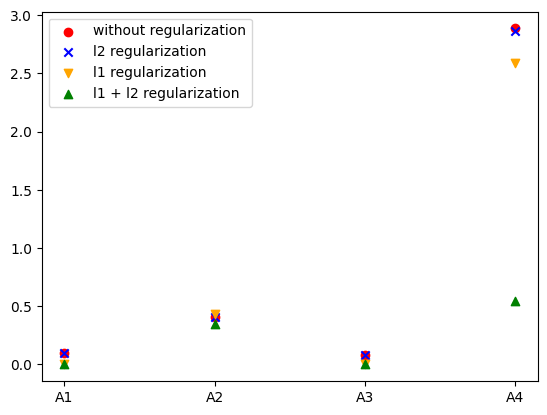

In [18]:
number_of_features = X.shape[1]
plt.xticks(np.arange(0, number_of_features), ['A1', 'A2', 'A3', 'A4'])
plt.scatter(np.arange(0, number_of_features), model.coef_, color='red', marker='o', label='without regularization' )
plt.scatter(np.arange(0, number_of_features), ridge_model.coef_, color='blue', marker='x', label='l2 regularization')
plt.scatter(np.arange(0, number_of_features), lasso_model.coef_, color='orange', marker='v', label='l1 regularization')
plt.scatter(np.arange(0, number_of_features), elastic_model.coef_, color='green', marker='^', label='l1 + l2 regularization')
plt.legend(loc='best')
plt.show()

As we can see, the presense of the $L_1$ regularization brings the coefficients with the attributes $A_1$ and $A_3$ to zero.